# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Merge multiple DataFrame objects along columns ( 5 pts )

Given the following temperature datasets, merge them to a large dataframe using pandas

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
url1 = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv"
url2 = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
#create seperate data frames

df = pd.concat([df1,df2], axis = 0)
#axis = 0 to specify we want to concatenate by adding rows not columns

df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
139754,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
139755,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
139756,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
fipsurl =  f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv"
stationurl = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv"

fipsdf = pd.read_csv(fipsurl)
stationdf = pd.read_csv(stationurl)

#create a new column in df that contains just the fips code extracted from the id
df["FIPS 10-4"] = df["ID"].str[0:2]

#merge df with fips to obtain country name column we need
df3 = pd.merge(df, fipsdf, on = ["FIPS 10-4"])

#merge result with station to obtain the lattitude, longitude, and station name columns we need
df4 = pd.merge (df3, stationdf, on = ["ID"])

#drop any unnecessary columns
df4 = df4.drop(["FIPS 10-4", "ISO 3166", "STNELEV"], axis = 1)

#Rename country name column for clarity
df = df4.rename(columns = {"Name": "Country"})

#divide every temperature value by 100
counter = 1
for i in range (12):
    month = "VALUE"+ str(counter)
    df[month] = df[month]/100
    counter+=1
df


,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,Country,LATITUDE,LONGITUDE,NAME
0,AG000060390,1901,10.34,8.44,11.64,15.34,15.64,23.54,24.44,23.64,22.14,16.04,13.64,10.04,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
1,AG000060390,1902,9.84,11.94,12.54,15.44,15.14,19.84,24.84,25.74,21.64,16.94,14.94,11.34,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
2,AG000060390,1903,11.44,10.64,12.66,13.46,16.46,19.06,23.26,24.46,21.46,19.26,13.56,10.56,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
3,AG000060390,1904,9.26,11.26,11.36,14.06,18.36,21.26,25.16,26.06,20.76,18.26,13.76,12.46,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
4,AG000060390,1905,9.06,8.66,13.86,15.76,15.96,21.46,23.26,24.96,22.06,17.16,13.86,10.76,Algeria,36.7167,3.250,ALGER_DAR_EL_BEIDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,ZA000067743,2020,NaN,24.00,23.75,NaN,NaN,NaN,16.05,NaN,NaN,NaN,NaN,NaN,Zambia,-17.8170,25.817,LIVINGSTONE
181311,ZAM00067663,2011,22.80,22.84,22.50,21.90,20.00,18.40,17.00,18.65,22.80,24.90,24.65,24.00,Zambia,-14.4500,28.467,KABWE_MILLIKEN
181312,ZAM00067663,2012,23.10,22.34,22.95,19.70,18.50,17.50,NaN,NaN,NaN,NaN,NaN,NaN,Zambia,-14.4500,28.467,KABWE_MILLIKEN
181313,ZAM00067663,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.85,Zambia,-14.4500,28.467,KABWE_MILLIKEN


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [4]:
def query_climate(df, country, year_begin, year_end, month):

    '''This function takes in 5 arguments: a data frame, country, year to begin, year to end, and month.
    It will return a new data frame of temperature data from the country specified, between the range of years specified during the month specified. 
    The new data frame has the following columns and their respective data:
    NAME (station name), LATITUDE (latitude of station), LONGITUDE (longitude of station), Country (Country station is located),
    Year (year reading is taken), Month (month reading is taken), Temp (Temperature at specified station year and month)
    '''
    
    df = df[df["Country"] == country]
    df = df[df["Year"] >= year_begin]
    df = df[df["Year"] <= year_end]
    #narrow data frame into only the country and year range interested in
    
    df["Month"] = month
    #add month column with value of month
    
    month = "VALUE" + str(month)
    #make month input the same as the header title for that month  

    newdf = df[["NAME", "LATITUDE", "LONGITUDE", "Country", "Year", "Month", month]]
    newdf = newdf.rename(columns = {month: "Temp"})
    #construct new data frame and fill with columns from old df, in the order required. Rename properly
    
    return newdf

#test example
query_climate(df = df, country = "India", year_begin = 1900, year_end = 2020, month = 1)


,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
42110,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
42111,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
42112,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
42113,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
42114,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
43526,MINICOY,8.30,73.15,India,2013,1,28.12
43527,MINICOY,8.30,73.15,India,2014,1,27.95
43528,MINICOY,8.30,73.15,India,2015,1,27.75
43529,SHILONG,25.60,91.89,India,2011,1,9.93


Run this example and check if you get the correct result, your obtained dataframe looks like:

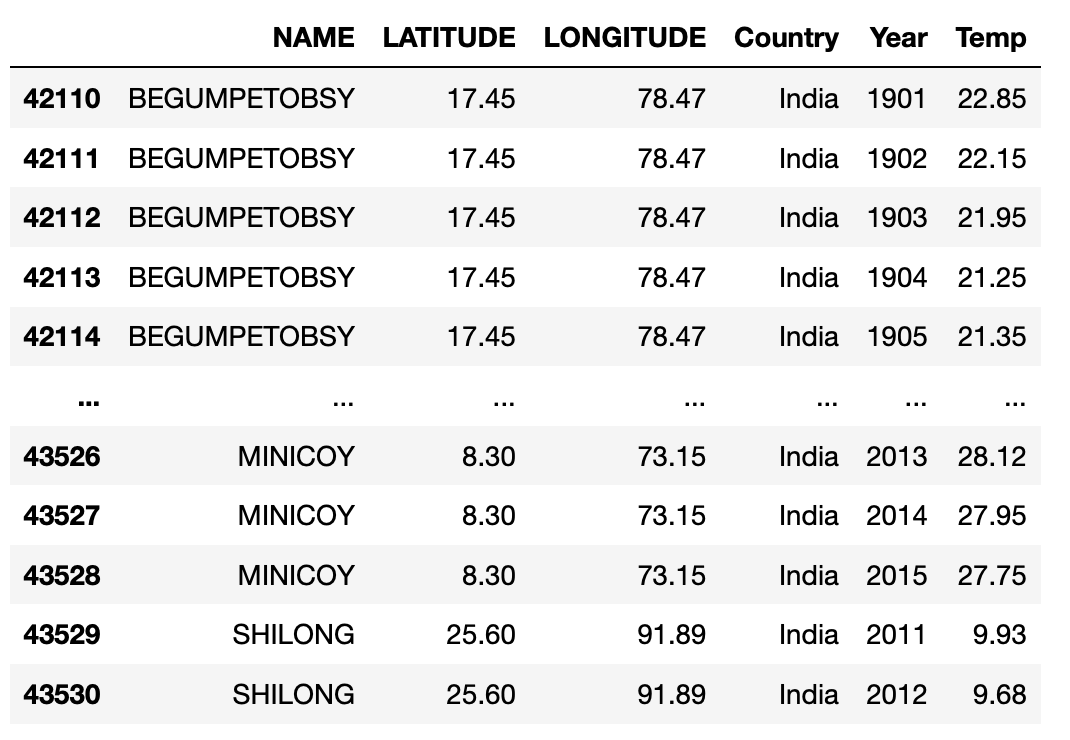

## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

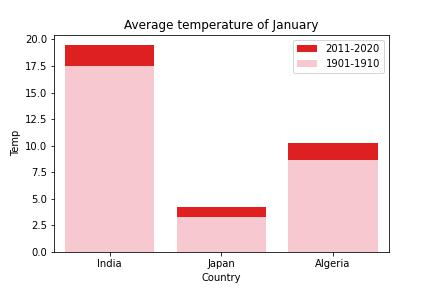

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

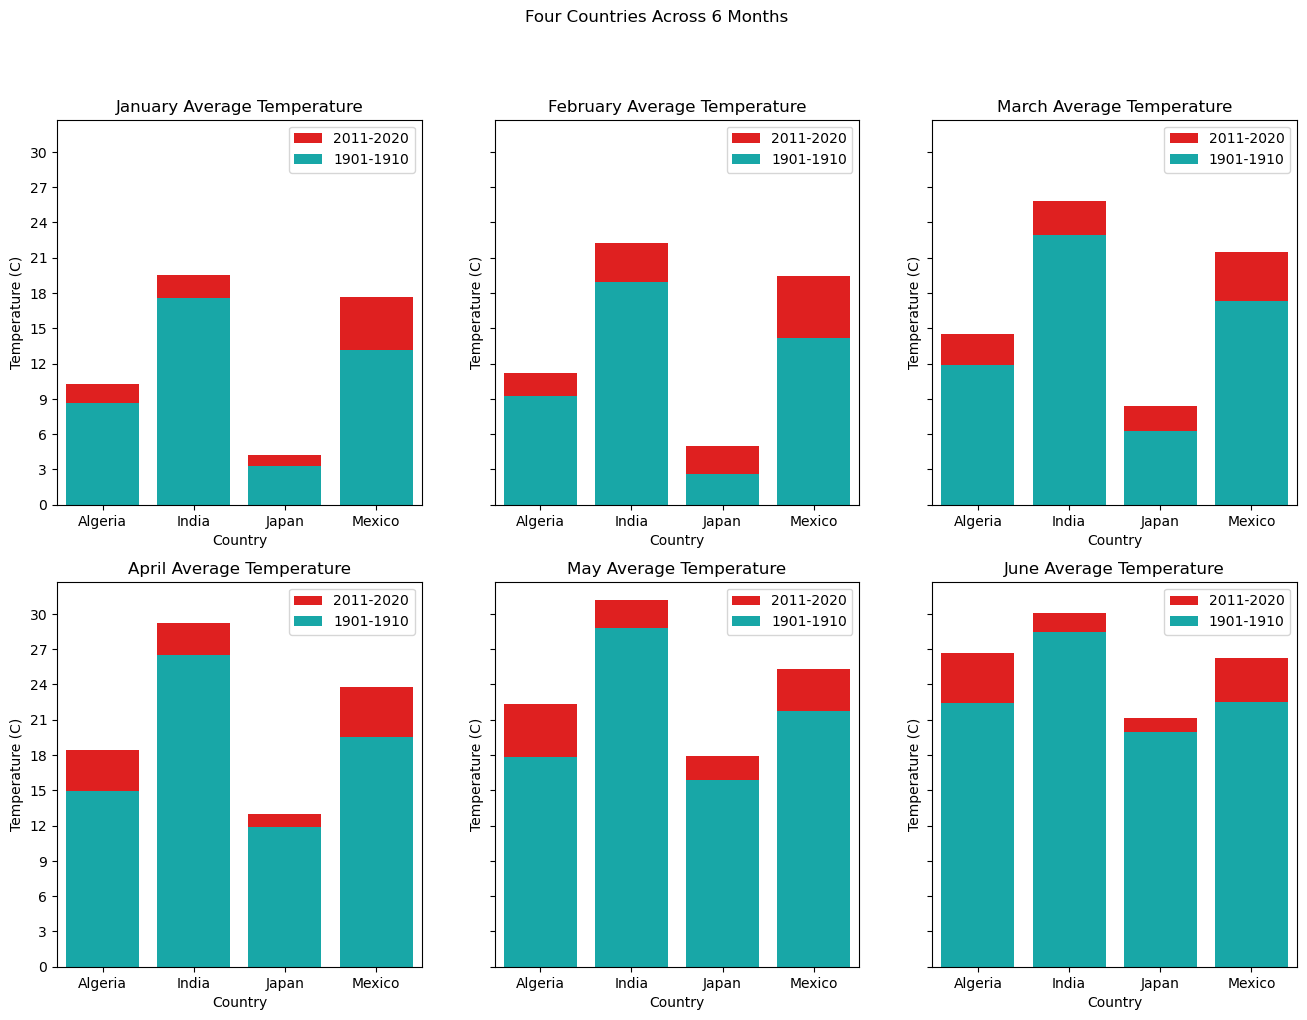

In [5]:

#create subplot with 6 empty graphs to fill in below
fig, ax = plt.subplots(2,3, sharey=True, figsize=(16,11))
fig.suptitle('Four Countries Across 6 Months')

#narrow data frame to only the 4 countries interested in
dfbarplot = df[(df["Country"] == "India") | (df["Country"] == "Japan") | (df["Country"] == "Algeria") |(df["Country"] == "Mexico")]

#two new data frames, one with only years 2011-2020 and one with only old years 1901-1910
dfnewyears = dfbarplot.loc[(df["Year"] >= 2011) & (df["Year"] <= 2020)]
dfoldyears = dfbarplot.loc[(df["Year"] >= 1901) & (df["Year"] <= 1910)]

#create a function to fill in each month's subplot
def plothelper (data, month, axcount, color, label):

    '''This function takes in a data frame, a month title (for ex VALUE1), an integer axcount that will be used to index which subplot
    to fill in, a color either red or cayan, and a label that will be used for the legend. It does not have a return value but the
    function will fill in a subplot using the appropriate information during the call'''

    
    #fill in subplot at index designated by axcount with a barplot using country on x, temperature for that month on y axes
    sns.barplot(data = data, x = "Country", y = month, ax = ax[int(axcount/3),axcount%3], color = color, label = label, errorbar = None)

    #for the subplot we are on, set y label and tick spacing
    ax[int(axcount/3),axcount%3].set_ylabel("Temperature (C)")
    ax[int(axcount/3), axcount%3].yaxis.set_ticks(range(0,33,3))
    
#counter will allow us to index each of the 6 plots into the correct axis, as well as iterate through months
counter = 1

#fill in each subplot once with data frame of recent years in red, and again with old years in blue
for i in range (6):
    plothelper (dfnewyears, "VALUE" + str(counter), counter - 1, "r", "2011-2020")
    plothelper (dfoldyears, "VALUE" + str(counter), counter - 1, "c", "1901-1910")
    counter+=1

#make labels and graph pretty...
ax[0,0].set_title("January Average Temperature")
ax[0,1].set_title("February Average Temperature")
ax[0,2].set_title("March Average Temperature")
ax[1,0].set_title("April Average Temperature")
ax[1,1].set_title("May Average Temperature")
ax[1,2].set_title("June Average Temperature")

#add legend for each subplot
for i in range (2):
    for j in range (3):
        ax[i,j].legend()
 

Conclusion: It is clear that global warming has had an impact on countries throughout the world, throughout multiple seasons. I chose four different countries in very different geographical locations, and chose months spanning from winter to summer (Jan to June), and my graphs still display a notable uptick in average temperatures in recent years 2011-2020 compared to 1901-1910 in every case. More specifically, I noticed that Mexico in almost every month had the largest difference between temperatures in recent years vs a century ago, leading me to believe Central America might be particularly affected by global warming. Additionally, I noticed that among India, Japan, and Mexico, the average temperature difference between recent and past years is significantly larger in February than in June. This reinforces the point that global warming is not just an issue that affects us in the summer like we might assume, it is significantly impacting our winters as well.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

PLOT ONE: Comparing monthly global warming trends in recent years vs past years in Nigeria.
Goal: Make a line plot with the x axis spanning every month in a year, and the y axis being the average temperature recorded in that month. I will then plot the average monthly temperature in years 1900-1910 and the average montly temperature in years 2011-2020, in order to see how the temperature pattern throughout the year has changed in the past century. This will require isolating the Nigeria data, stacking the months to pull them out of columns, averaging out the old years as one group vs current years as another group and then visualizing using a seaborn line plot. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Comparing 1901-1910 vs 2011-2020 Monthly Temperature in Nigeria')

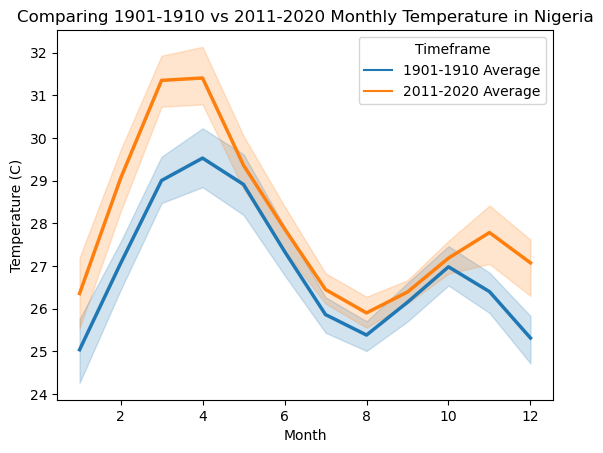

In [6]:
#Create new data frame with only nigeria, drops unneccesary columns, only need year and temp values
dfus = df.loc[(df["Country"] == "Nigeria")]
dfus = dfus.drop(["ID", "Country", "LATITUDE", "LONGITUDE", "NAME"], axis = 1)

#Perform Stacking...
dfus = dfus.set_index(keys = ["Year"])
dfus = dfus.stack()
dfus = dfus.reset_index()
dfus = dfus.rename(columns = {"level_1"  : "Month" , 0 : "Temperature (C)"})

#Change months title to an int value (for ex VALUE1 to 1, etc)
dfus["Month"] = dfus["Month"].str[5:]
dfus["Month"] = dfus["Month"].astype(int)

#add column indicating wether the year is in the 1901-1910 group, or 2011-2020 group. This will become the hue
dfus["Timeframe"] = dfus["Year"].apply(lambda x: "2011-2020 Average" if x > 1910 else "1901-1910 Average")

#Create plot
sns.lineplot(data = dfus, x = "Month", y = "Temperature (C)", hue = "Timeframe", linewidth = 2.5)
plt.title("Comparing 1901-1910 vs 2011-2020 Monthly Temperature in Nigeria")

CONCLUSION: Based on this plot, it is clear to conclude that Nigeria has experienced a significant amount of warming in the past century. We see that in every month, the 2011-2020 temperature average is notably higher than the 1901-1910 average. This plot also includes a confidence interval to display how much variation the data has from the average that was computed, and it supports the same trend. We see that Nigeria has experienced the most global warming in months march and april, because here there is the largest difference in temperature 1901-1910, vs 2011-2020.


PLOT TWO: Compare yearly average temperatures in 1901 vs 2020 in multiple different countries.
Goal: Currently, our data has only charted changes in temperature among different months, but now I want to track wether the YEARLY average temperature has changed across the last century. To do this, I will add a new column to the data frame with the year's average temperature, then for four different countries, I will use a catplot barplot to compare the country's yearly average temperature in 1901 and the yearly average in 2020. 

Text(0.5, 0.98, 'Yearly Average Temperature Comparison')

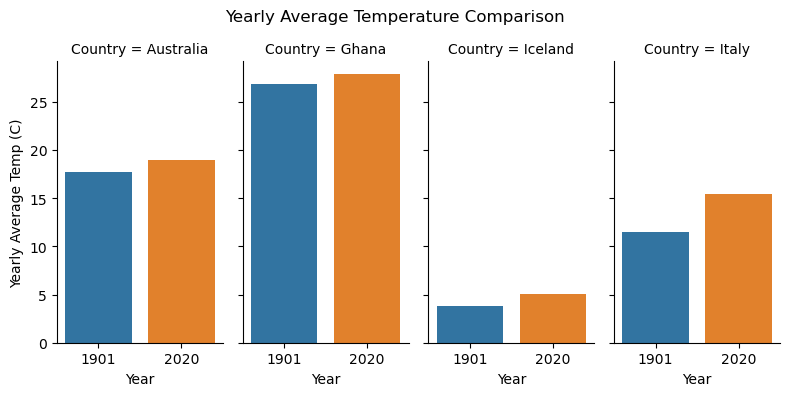

In [7]:
#pull out only data of years 1901 or 2020
dfscat = df.loc[(df["Year"] == 1901) | (df["Year"] == 2020)]

#pull out only data that belongs in one of the four countries we are itnerested in
dfscat = dfscat.loc[(df["Country"] == "Ghana")| (df["Country"] == "Italy") | (df["Country"] == "Australia") | (df["Country"] == "Iceland")]

#Make a new column with yearly average temperature, taken by summing value1 through value12 temps and dividing by 12
dfscat["Yearly Average Temp (C)"] = (dfscat["VALUE1"] + dfscat["VALUE2"] + dfscat["VALUE3"] + dfscat["VALUE4"]+ dfscat["VALUE5"] + dfscat["VALUE6"] +dfscat["VALUE7"] + dfscat["VALUE8"] + dfscat["VALUE9"] + dfscat["VALUE10"]+ dfscat["VALUE11"] + dfscat["VALUE12"])/12

#plot using a catplot, with each country getting a different column
figure = sns.catplot(dfscat, kind="bar",x="Year", y="Yearly Average Temp (C)", col="Country",
    height=4, aspect=.5, errorbar = None)

#add super title and adjust top spacing to display it
figure.fig.subplots_adjust(top=0.85)
figure.fig.suptitle('Yearly Average Temperature Comparison')


CONCLUSION: Around the world, countries have seen their overall yearly average temperatures rise in the past century. We see that in Australia, Ghana, Iceland, and Italy the yearly average temp is notably higher in 2020 than it used to be in 1901, which provides evidence that global warming has had a significant impact on our world. 

PLOT 3: Create two scatterplots to compare the trend in temperature in years 1901-1910 and in 2011-2020 in Iceland. I will plot every month of each year along the x axis, which will require me to stack the month columns and create a new date-time column. The y axis will display the temperature at that date, and the graphs will be comparable side-to-side using a subplot.

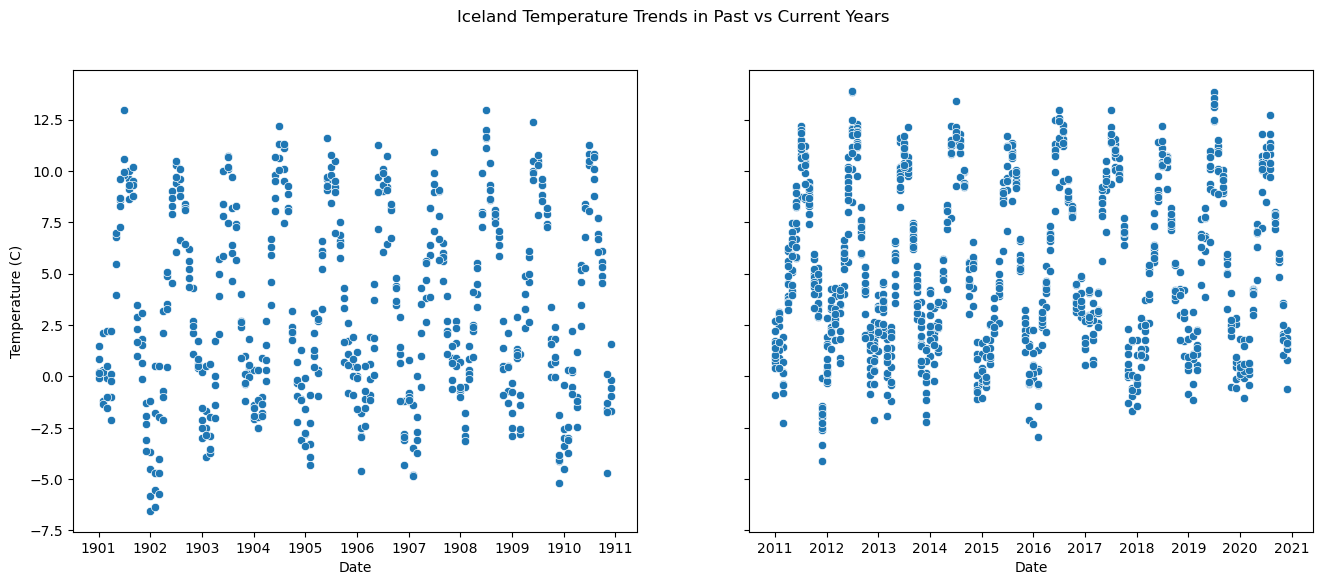

In [8]:
#create 2 subplots that are empty, will fill in below
fig, ax = plt.subplots(1,2, sharey=True, figsize=(16,6))
fig.suptitle('Iceland Temperature Trends in Past vs Current Years')

#function that performs the plotting, each subplot can be filled in using this instead of repeating the code twice
def plotter (dfx, ax):
    
    '''This function takes in a data frame and an integer ax that will be used to index which subplot to fill in. It does not have a return
    value but it will create a scatterplot in the designated subplot with the designated data frame during the funciton call'''
    
    #stack data frame to give each month's temperature a row
    dfx = dfx.drop(["ID", "LATITUDE", "LONGITUDE", "NAME", "Country"], axis = 1)
    dfx = dfx.set_index(keys = ["Year"])
    dfx = dfx.stack()
    dfx = dfx.reset_index()
    dfx = dfx.rename(columns = {"level_1"  : "Month" , 0 : "Temperature (C)"})

    #Change month title to integer value (ie VALUE1 becomes 1, etc)
    dfx["Month"] = dfx["Month"].str[5:]
    dfx["Month"] = dfx["Month"].astype(int)

    #create date-time column to use for plotting
    dfx["Date"] = dfx["Year"].astype(str) + "-" + dfx["Month"].astype(str)
    dfx["Date"] = pd.to_datetime(dfx["Date"])

    #create scatterplot, using data-time on x axis and temperature on y
    sns.scatterplot(data = dfx, x= "Date", y = "Temperature (C)", ax = ax)

#plot data 1901-1910 using plotter function in first subplot
dfpast = df.loc[(df["Country"] == "Iceland") & (df["Year"] < 2011)]
plotter (dfpast, ax[0])

#plot data 2011-2020 using plotter function in second subplot
dfpresent = df.loc[(df["Country"] == "Iceland") & (df["Year"] >= 2011)]
plotter (dfpresent, ax[1])


CONCLUSION: The scatterplots display a slight overall increase in temperatures in Iceland in recent years compared to 1901-1910, particularly in the colder months. We see in the 1901-1910 plot there was many winter seasons with temperatures that strayed below -5 degrees, while in the recent years none of these lows existed, they were almost always -2.5 or higher. We can conclude that in Iceland, the winter months have had notably higher temperatures in recent years than a century ago.  

## Publish (5 pts)

Publish your work on github:

1. Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link. 

https://github.com/graceli5/HW.git